# Requirements

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd
import missingno as msno
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Laboratory Exercise - Run Mode (8 points)

## The Mental Health Diagnosis and Treatment Monitoring Dataset
The dataset contains information on 500 individuals, focusing on mental health diagnoses, treatment plans, and outcomes. Key features include patient demographics such as age and gender, as well as specific mental health conditions (e.g., anxiety, depression, etc.). The dataset also captures symptom severity, mood scores, sleep quality, and stress levels, all rated on a scale of 1 to 10, providing insight into the patient's mental and physical well-being. Additionally, it includes details on treatment plans, including prescribed medications (e.g., SSRIs, antidepressants, etc.), therapy types (e.g., CBT, DBT, etc.), and treatment duration. Progress tracking is also incorporated, with ratings for treatment progress and AI-detected emotional state, alongside adherence to the treatment plan. The 'outcome' attribute, which indicates whether the treatment was improved, deteriorated, or unaffected, serves as the target variable for the analysis, while the remaining attributes can be used to explore and model the factors affecting mental health treatment outcomes.

Load the dataset into a `pandas` data frame.

In [2]:
data = pd.read_csv('mental_health_diagnosis_treatment_data.csv')

Preprocess the input and the output variables appropriately.

In [3]:
data.head()

,Patient ID,Age,Gender,Diagnosis,Symptom Severity (1-10),Mood Score (1-10),Sleep Quality (1-10),Physical Activity (hrs/week),Medication,Therapy Type,Treatment Start Date,Treatment Duration (weeks),Stress Level (1-10),Outcome,Treatment Progress (1-10),AI-Detected Emotional State,Adherence to Treatment (%)
0,1,43.0,Female,Major Depressive Disorder,10,5,8,NaN,Mood Stabilizers,Interpersonal Therapy,2024-01-25,11,NaN,Deteriorated,7,Anxious,66
1,2,40.0,Female,Major Depressive Disorder,9,5,4,7.0,Antipsychotics,Interpersonal Therapy,2024-02-27,11,7.0,No Change,7,Neutral,78
2,3,55.0,Female,Major Depressive Disorder,6,3,4,NaN,SSRIs,Mindfulness-Based Therapy,2024-03-20,14,NaN,Deteriorated,5,Happy,62
3,4,34.0,Female,Major Depressive Disorder,6,3,6,5.0,SSRIs,Mindfulness-Based Therapy,2024-03-29,8,8.0,Deteriorated,10,Excited,72
4,5,52.0,Male,Panic Disorder,7,6,6,8.0,Anxiolytics,Interpersonal Therapy,2024-03-18,12,5.0,Deteriorated,6,Excited,63


Explore the dataset using visualizations of your choice.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    500 non-null    int64  
 1   Age                           475 non-null    float64
 2   Gender                        500 non-null    object 
 3   Diagnosis                     500 non-null    object 
 4   Symptom Severity (1-10)       500 non-null    int64  
 5   Mood Score (1-10)             500 non-null    int64  
 6   Sleep Quality (1-10)          500 non-null    int64  
 7   Physical Activity (hrs/week)  450 non-null    float64
 8   Medication                    500 non-null    object 
 9   Therapy Type                  500 non-null    object 
 10  Treatment Start Date          500 non-null    object 
 11  Treatment Duration (weeks)    500 non-null    int64  
 12  Stress Level (1-10)           400 non-null    float64
 13  Outco

In [6]:
data.isnull().sum()

Patient ID                        0
Age                              25
Gender                            0
Diagnosis                         0
Symptom Severity (1-10)           0
Mood Score (1-10)                 0
Sleep Quality (1-10)              0
Physical Activity (hrs/week)     50
Medication                        0
Therapy Type                      0
Treatment Start Date              0
Treatment Duration (weeks)        0
Stress Level (1-10)             100
Outcome                           0
Treatment Progress (1-10)         0
AI-Detected Emotional State       0
Adherence to Treatment (%)        0
dtype: int64

Check if the dataset is balanced.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

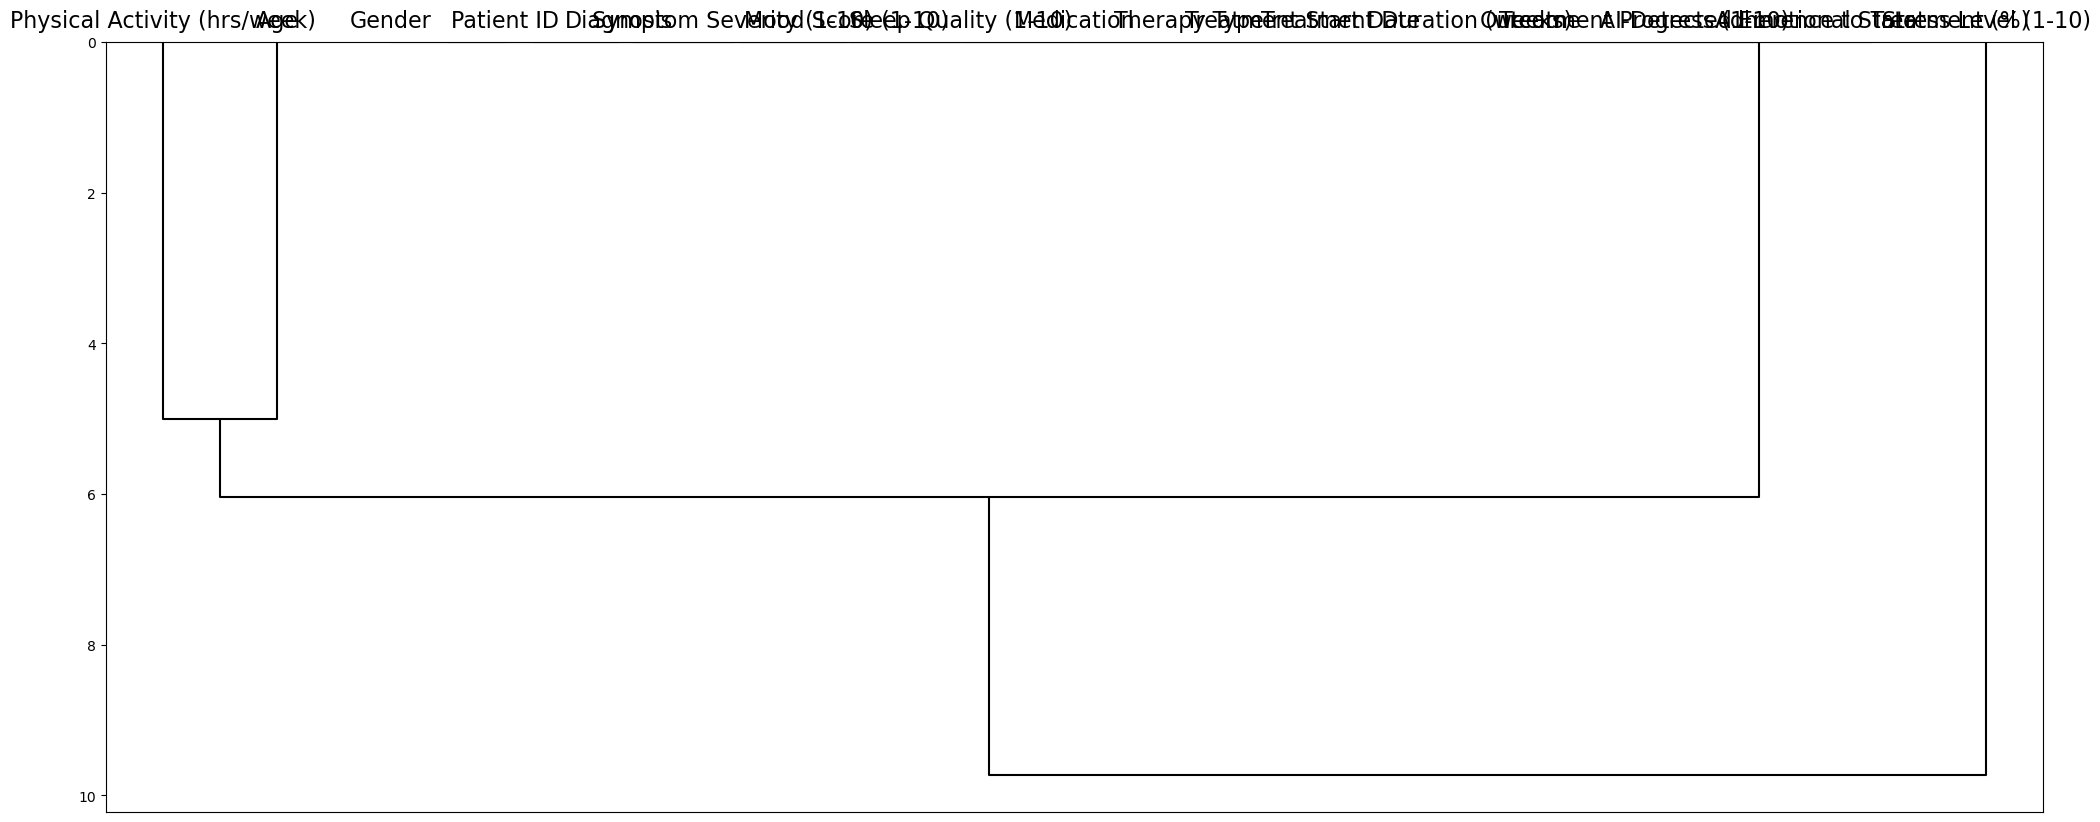

In [7]:
msno.dendrogram(data)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [31]:
data.isnull().sum()

Patient ID                      0
Age                             0
Gender                          0
Diagnosis                       0
Symptom Severity (1-10)         0
Mood Score (1-10)               0
Sleep Quality (1-10)            0
Physical Activity (hrs/week)    0
Medication                      0
Therapy Type                    0
Treatment Start Date            0
Treatment Duration (weeks)      0
Stress Level (1-10)             0
Outcome                         0
Treatment Progress (1-10)       0
AI-Detected Emotional State     0
Adherence to Treatment (%)      0
dtype: int64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

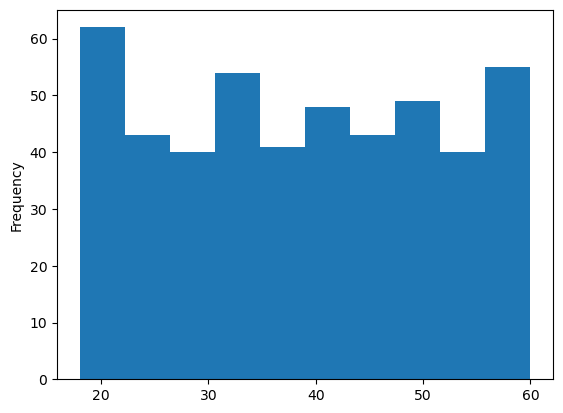

In [13]:
data.Age.plot.hist()
plt.show()

In [16]:
data.Age = data.Age.fillna(data.Age.mean())

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [25]:
data['Physical Activity (hrs/week)'] = data['Physical Activity (hrs/week)'].fillna(data['Physical Activity (hrs/week)'].mean())

In [30]:
data['Stress Level (1-10)'] = data['Stress Level (1-10)'].fillna(data['Stress Level (1-10)'].mean())

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    500 non-null    int64  
 1   Age                           500 non-null    float64
 2   Gender                        500 non-null    int32  
 3   Diagnosis                     500 non-null    int32  
 4   Symptom Severity (1-10)       500 non-null    int64  
 5   Mood Score (1-10)             500 non-null    int64  
 6   Sleep Quality (1-10)          500 non-null    int64  
 7   Physical Activity (hrs/week)  500 non-null    float64
 8   Medication                    500 non-null    int32  
 9   Therapy Type                  500 non-null    int32  
 10  Treatment Start Date          500 non-null    int32  
 11  Treatment Duration (weeks)    500 non-null    int64  
 12  Stress Level (1-10)           500 non-null    float64
 13  Outco

In [53]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data['Treatment Start Date'])
data['AI-Detected Emotional State'] = encoded_values

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [68]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Outcome','Age','Gender','AI-Detected Emotional State'])  
y = data['Outcome'] 

X_train, X_test, Y_train, Y_test = train_test_split(
    X,  y, test_size=0.2)

## Feature Scaling
Standardize the features appropriately.

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Model Selection

Choose and train an approriate model for the given task.

In [74]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=27)
classifier.fit(X_train, Y_train)
KNeighborsClassifier()
y_pred = classifier.predict(X_test)

Use the trained model to make predictions for the test set.

In [75]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Assess the performance of the model by using different classification metrics.

In [85]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

In [86]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter= 15000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=15000)

In [87]:
y_pred = model.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.00


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [77]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Outcome'])  
y = data['Outcome'] 

X_train, X_test, Y_train, Y_test = train_test_split(
    X,  y, test_size=0.1)

## Feature Scaling
Standardize the features appropriately.

In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [83]:
from sklearn.model_selection import GridSearchCV, train_test_split
import numpy as np

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 50)}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5)  # 5-fold cross-validation
grid_search.fit(X_train, Y_train)

C:\Users\Drej\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [84]:
best_n_neighbors = grid_search.best_params_['n_neighbors']
print(f"Best n_neighbors: {best_n_neighbors}")

best_knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
best_knn.fit(X_train, Y_train)

Y_pred = best_knn.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_pred)
print(f"Test set accuracy: {test_accuracy:.4f}")

Best n_neighbors: 1
Test set accuracy: 0.0400
